# Assignment 5

In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns

In [5]:
import matplotlib as plt

## Importing the data

In [7]:
df=pd.read_csv('city_day.csv')

In [9]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [13]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

<Axes: >

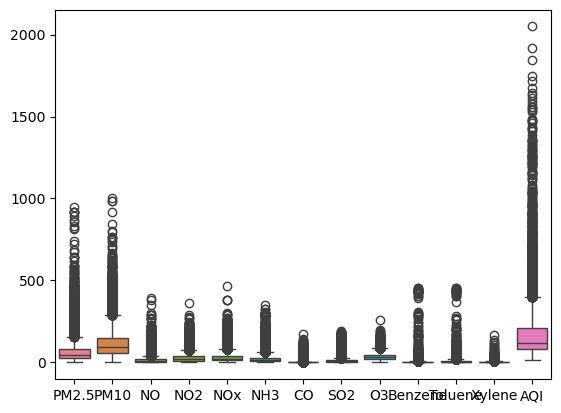

In [15]:
sns.boxplot(df)

#### It is observed that there are many outliers, therefore median is used for replacing NaN values in numerical data ;
#### Whereas mode is used for categorical data (AQI_Bucket)

## Removing NullValues

In [60]:
data=df

In [62]:
numerical_data=data.select_dtypes(include=['float64']).columns

In [64]:
data[numerical_data] = data[numerical_data].fillna(data[numerical_data].median())
data['AQI_Bucket'] = data['AQI_Bucket'].fillna(data['AQI_Bucket'].mode()[0])

In [66]:
data = data.drop_duplicates()

## Verifing the changes

In [69]:
data.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  Xylene      29531 non-null  float64
 14  AQI         29531 non-null  float64
 15  AQI_Bucket  29531 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


## Data transformation

In [74]:
data['AQI_Bucket'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

In [76]:
data['AQI_Bucket'].unique().size

6

In [78]:
from sklearn.preprocessing import OrdinalEncoder
manual_order = [['Good','Satisfactory','Moderate','Poor','Very Poor','Severe']]

In [80]:
encoder = OrdinalEncoder(categories = manual_order)
data['AQI_Bucket']=encoder.fit_transform(data[['AQI_Bucket']])

In [82]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,2.0
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,2.0
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,2.0
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,2.0
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,2.0


In [84]:
data['AQI_Bucket'].unique()

array([2., 3., 4., 5., 1., 0.])

## Data Normalization

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
numerical_cols = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket']

In [92]:
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [94]:
data.head(8)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,0.051087,0.095671,0.002304,0.050276,0.036674,0.044888,0.005233,0.142533,0.517422,0.000000,0.000044,0.000000,0.051572,0.4
1,Ahmedabad,2015-01-02,0.051087,0.095671,0.002432,0.043291,0.035199,0.044888,0.005517,0.126593,0.132120,0.008087,0.012092,0.022128,0.051572,0.4
2,Ahmedabad,2015-01-03,0.051087,0.095671,0.044489,0.053258,0.063512,0.044888,0.098970,0.149910,0.119083,0.014944,0.036056,0.013207,0.051572,0.4
3,Ahmedabad,2015-01-04,0.051087,0.095671,0.004300,0.050994,0.038428,0.044888,0.009670,0.095847,0.139958,0.009736,0.022293,0.005870,0.051572,0.4
4,Ahmedabad,2015-01-05,0.051087,0.095671,0.056520,0.059111,0.080748,0.044888,0.125704,0.202837,0.152491,0.015406,0.041530,0.016317,0.051572,0.4
5,Ahmedabad,2015-01-06,0.051087,0.095671,0.116188,0.106212,0.174283,0.044888,0.258290,0.236007,0.180428,0.011911,0.023810,0.011328,0.051572,0.4
6,Ahmedabad,2015-01-07,0.051087,0.095671,0.287053,0.112120,0.279644,0.044888,0.637961,0.166469,0.129831,0.000000,0.000000,0.000000,0.051572,0.4
7,Ahmedabad,2015-01-08,0.051087,0.095671,0.206957,0.101408,0.206894,0.044888,0.459985,0.198762,0.123700,0.000000,0.000000,0.000000,0.051572,0.4
